In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.ticker

Применение алгоритмов машинного обучения с учителем. В качестве "меток", полезных сигналов акустической эмиссии используется форма сигналов, полученных с помощью временной фильтрации. Временная фильтрация заключается в выделении сигналов акустической эмиссии, для которых разница времени прихода на 1-ый и 2-ой канал составляет не более 25 мкс. Такой алгоритм фильтрации обусловлен тем, что 1-ый и 2-ой преобразователи акустическрй эмиссии равноудалены от концентратора напряжений в образце, который является источником сигналов акустической эмиссии.  

In [2]:
col = ['Date', 'Time', 'mks', 'Time relative', 'Number of channel', 'Type', 'Amplitude, ADC', 'Amplitude, dB', 'Amplitude, mkV',
       'Amplitude/Counts, mkV', 'Ln(Amplitude)/Counts', 'Energy, J', 'Energy, dB', 'Energy MARSE', 'Duration', 'Rise time', 
       'Counts', 'Counts/Duration, kHz', 'Flags']

Загрузка файла, сформированного с помощью временной фильтрации

In [3]:
f = open(r'C:\Users\homepc\Documents\Pyton\aem08_02_13#04_фильтр25_AE.txt', 'r', encoding="utf-16")
frame_25 = pd.read_table(f, sep ='\s+', names = col)
f.close()

In [4]:
frame_25

,Date,Time,mks,Time relative,Number of channel,Type,"Amplitude, ADC","Amplitude, dB","Amplitude, mkV","Amplitude/Counts, mkV",Ln(Amplitude)/Counts,"Energy, J","Energy, dB",Energy MARSE,Duration,Rise time,Counts,"Counts/Duration, kHz",Flags
0,8.02.13,10:56:11,596315,16,1,(АЭ),30,39.3,91.8,45.9,0.17834,8408163,69.2,2899683.2,16,1,2,125,---
1,8.02.13,10:56:11,596298,16,2,(АЭ),61,45.4,186.6,11.7,0.06665,21105937,73.2,4594119.9,153,18,16,104,--O
2,8.02.13,10:56:15,435415,20,2,(АЭ),56,44.7,171.3,7.8,0.04458,23528857,73.7,4850655.3,114,8,22,192,---
3,8.02.13,10:56:15,435414,20,1,(АЭ),87,48.5,266.1,16.6,0.08884,29760210,74.7,5455291.9,251,7,16,63,--O
4,8.02.13,10:56:15,452218,20,2,(АЭ),77,47.4,235.5,11.2,0.06187,29445601,74.7,5426380.1,247,15,21,85,--O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,8.02.13,11:49:28,754301,3213,1,(АЭ),77,47.4,235.5,19.6,0.10827,20778228,73.2,4558314.1,121,6,12,99,--O
844,8.02.13,11:49:40,620126,3225,1,(АЭ),28,38.7,85.7,42.8,0.14384,6063662,67.8,2462450.4,16,15,2,125,--O
845,8.02.13,11:49:40,620115,3225,2,(АЭ),49,43.5,149.9,13.6,0.07703,13595561,71.3,3687215.9,147,12,11,74,--O
846,8.02.13,11:49:43,876297,3228,2,(АЭ),43,42.4,131.5,6.6,0.03583,16009684,72.0,4001210.3,113,17,20,176,--O


Преобразование информации о времени регистрации сигналов акустической эмиссии в формат "datatime"

In [5]:
def f(x):
    date = x['Date'] + ' ' + x['Time'] + '.' + str(x['mks'])
    return datetime.strptime(date, '%d.%m.%y %H:%M:%S.%f')

In [6]:
time = frame_25.apply(f, axis = 1)
frame_25['Time'] = time
frame_25 = frame_25.drop(['Date', 'mks', 'Type', 'Flags'], axis = 1)

In [7]:
frame_25

,Time,Time relative,Number of channel,"Amplitude, ADC","Amplitude, dB","Amplitude, mkV","Amplitude/Counts, mkV",Ln(Amplitude)/Counts,"Energy, J","Energy, dB",Energy MARSE,Duration,Rise time,Counts,"Counts/Duration, kHz"
0,2013-02-08 10:56:11.596315,16,1,30,39.3,91.8,45.9,0.17834,8408163,69.2,2899683.2,16,1,2,125
1,2013-02-08 10:56:11.596298,16,2,61,45.4,186.6,11.7,0.06665,21105937,73.2,4594119.9,153,18,16,104
2,2013-02-08 10:56:15.435415,20,2,56,44.7,171.3,7.8,0.04458,23528857,73.7,4850655.3,114,8,22,192
3,2013-02-08 10:56:15.435414,20,1,87,48.5,266.1,16.6,0.08884,29760210,74.7,5455291.9,251,7,16,63
4,2013-02-08 10:56:15.452218,20,2,77,47.4,235.5,11.2,0.06187,29445601,74.7,5426380.1,247,15,21,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,2013-02-08 11:49:28.754301,3213,1,77,47.4,235.5,19.6,0.10827,20778228,73.2,4558314.1,121,6,12,99
844,2013-02-08 11:49:40.620126,3225,1,28,38.7,85.7,42.8,0.14384,6063662,67.8,2462450.4,16,15,2,125
845,2013-02-08 11:49:40.620115,3225,2,49,43.5,149.9,13.6,0.07703,13595561,71.3,3687215.9,147,12,11,74
846,2013-02-08 11:49:43.876297,3228,2,43,42.4,131.5,6.6,0.03583,16009684,72.0,4001210.3,113,17,20,176


Загрузка файла данных, содержащих информацию о форме сигналов акустической эмиссии

In [8]:
f = open(r'C:\Users\homepc\Documents\Pyton\aem08_02_13#04_osc2.txt', 'r', encoding="utf-16")
frame_osc = pd.read_table(f, sep ='\s+', names = ['Number of signal', 'Number of point', 'Time', 'Amplitude'])
f.close()

In [9]:
f1 = lambda x: float(x)
for column in ['Time', 'Amplitude']:
    frame_osc[column] = frame_osc[column].apply(f1)

In [10]:
time = frame_osc[frame_osc['Number of signal'] == 1]['Time']

In [11]:
dataset = frame_osc.drop('Time', axis = 1)
dataset = dataset.pivot('Number of signal', 'Number of point')
dataset

Amplitude                                               ...  \
Number of point       1    2    3    4    5    6    7    8    9    10    ...   
Number of signal                                                         ...   
1                     -1.0  0.0  1.0  1.0  1.0 -1.0 -2.0  0.0  1.0  1.0  ...   
2                      2.0  2.0  2.0  2.0  2.0  0.0 -1.0 -1.0  0.0  2.0  ...   
3                      2.0  3.0  3.0  3.0  0.0 -1.0  2.0  5.0  3.0  1.0  ...   
4                     -1.0 -2.0 -1.0  0.0 -1.0 -2.0 -1.0  2.0  4.0  3.0  ...   
5                      1.0  0.0  2.0  3.0  1.0  0.0  2.0  2.0  0.0 -2.0  ...   
...                    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
4535                   0.0 -1.0 -1.0 -1.0  0.0  1.0  1.0  2.0  2.0  1.0  ...   
4536                   6.0  4.0  3.0  3.0  3.0  0.0 -1.0 -1.0 -1.0 -3.0  ...   
4537                   2.0  3.0  4.0  4.0  2.0  0.0 -2.0 -1.0 -1.0 -1.0  ...   
4538                   2.0  2.0  3.0  5.0  6.0  4.0  2.0  0.0  0.0  0.0  ...   
4539                  -2.0 -1.0  2.0  3.0  1.0  0.0  0.0  1.0  2.0  0.0  ...   

                                                                      
Number of point   991   992  993  994  995  996  997  998  999  1000  
Number of signal                                                      
1                 -6.0  -4.0 -1.0  2.0  3.0  1.0 -2.0 -5.0 -6.0 -7.0  
2                 -4.0  -3.0 -3.0 -3.0 -2.0  0.0  1.0  1.0  2.0  3.0  
3                  4.0   4.0  4.0  3.0  0.0 -1.0  0.0  1.0  0.0 -3.0  
4                 -2.0  -1.0 -2.0 -3.0 -2.0 -1.0  0.0  2.0  3.0  3.0  
5                  3.0   2.0  4.0  6.0  6.0  2.0 -1.0 -1.0 -2.0 -3.0  
...                ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  
4535              -4.0  -4.0  2.0  3.0 -1.0 -3.0  1.0  3.0  1.0 -2.0  
4536               4.0   3.0  3.0  3.0  3.0  3.0  2.0  2.0  1.0  1.0  
4537              -2.0   0.0  0.0  1.0  2.0  3.0  2.0  0.0 -1.0  1.0  
4538             -13.0 -10.0 -6.0 -3.0 -2.0  0.0  3.0  5.0  6.0  7.0  
4539               2.0   1.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  0.0  

[4539 rows x 1000 columns]

Загрузка файла данных, содержащего информацию о времени регистрации сигналов акустической эмиссии

In [12]:
f = open(r'C:\Users\homepc\Documents\Pyton\aem08_02_13#04_osc1.txt', 'r', encoding="utf-16")
frame_head = pd.read_table(f, sep ='\s+', names = ['Number of signal', 'Date', 'Time', 'Number of channel', 'Window', 'Frequency', 'Size',
                                             'Duration', 'Pretrigg', 'Syncing', 'Threshold, ADC', 'Threshold, dB'])
f.close()

In [13]:
data_time = frame_head['Date'] + ' ' + frame_head['Time']
frame_head['Time'] = data_time
f = lambda x: datetime.strptime(x, '%d.%m.%y %H:%M:%S.%f')
data_time = frame_head['Time'].apply(f).to_frame(name = 'Time')
frame_head['Time'] = data_time
frame_head = frame_head.drop('Date', axis = 1)
frame_head

,Number of signal,Time,Number of channel,Window,Frequency,Size,Duration,Pretrigg,Syncing,"Threshold, ADC","Threshold, dB"
0,1,2013-02-08 10:56:00.610289,2,2,2000,1000,500,100,асинхр.,21,36.15612
1,2,2013-02-08 10:56:00.717464,2,2,2000,1000,500,100,асинхр.,21,36.15612
2,3,2013-02-08 10:56:00.717522,1,1,2000,1000,500,100,асинхр.,21,36.15612
3,4,2013-02-08 10:56:00.871622,1,1,2000,1000,500,100,асинхр.,21,36.15612
4,5,2013-02-08 10:56:00.871576,2,2,2000,1000,500,100,асинхр.,21,36.15612
...,...,...,...,...,...,...,...,...,...,...,...
4534,4535,2013-02-08 11:49:43.876297,2,2,2000,1000,500,100,асинхр.,21,36.15612
4535,4536,2013-02-08 11:49:44.157555,1,1,2000,1000,500,100,асинхр.,21,36.15612
4536,4537,2013-02-08 11:49:44.239422,1,1,2000,1000,500,100,асинхр.,21,36.15612
4537,4538,2013-02-08 11:49:44.371139,1,1,2000,1000,500,100,асинхр.,21,36.15612


In [14]:
frame_head = frame_head.set_index(frame_head['Number of signal'])

In [15]:
dataset_01 = dataset.loc[frame_head[frame_head['Number of channel'] == 1].index]
dataset_01

Amplitude                                               ...  \
Number of point       1    2    3    4    5    6    7    8    9    10    ...   
Number of signal                                                         ...   
3                      2.0  3.0  3.0  3.0  0.0 -1.0  2.0  5.0  3.0  1.0  ...   
4                     -1.0 -2.0 -1.0  0.0 -1.0 -2.0 -1.0  2.0  4.0  3.0  ...   
8                      2.0 -1.0 -1.0  0.0  0.0 -2.0 -3.0 -1.0  1.0  1.0  ...   
11                    -1.0  0.0  2.0  3.0  2.0  1.0  0.0  0.0  0.0  0.0  ...   
13                    -2.0 -4.0 -2.0  2.0  4.0  2.0  0.0  1.0  3.0  1.0  ...   
...                    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
4534                  -2.0 -1.0  2.0  3.0  4.0  4.0  4.0  1.0 -1.0  0.0  ...   
4536                   6.0  4.0  3.0  3.0  3.0  0.0 -1.0 -1.0 -1.0 -3.0  ...   
4537                   2.0  3.0  4.0  4.0  2.0  0.0 -2.0 -1.0 -1.0 -1.0  ...   
4538                   2.0  2.0  3.0  5.0  6.0  4.0  2.0  0.0  0.0  0.0  ...   
4539                  -2.0 -1.0  2.0  3.0  1.0  0.0  0.0  1.0  2.0  0.0  ...   

                                                                           
Number of point   991   992  993  994  995   996   997   998   999   1000  
Number of signal                                                           
3                  4.0   4.0  4.0  3.0  0.0  -1.0   0.0   1.0   0.0  -3.0  
4                 -2.0  -1.0 -2.0 -3.0 -2.0  -1.0   0.0   2.0   3.0   3.0  
8                  8.0  10.0  8.0  6.0  8.0  11.0  11.0  11.0  12.0  12.0  
11                -5.0  -5.0 -3.0 -1.0 -1.0  -2.0  -2.0   0.0   2.0   3.0  
13                 2.0  -1.0 -3.0 -1.0  1.0   2.0   2.0   2.0   4.0   5.0  
...                ...   ...  ...  ...  ...   ...   ...   ...   ...   ...  
4534               0.0  -1.0 -4.0 -4.0  2.0   6.0   4.0   0.0  -1.0   2.0  
4536               4.0   3.0  3.0  3.0  3.0   3.0   2.0   2.0   1.0   1.0  
4537              -2.0   0.0  0.0  1.0  2.0   3.0   2.0   0.0  -1.0   1.0  
4538             -13.0 -10.0 -6.0 -3.0 -2.0   0.0   3.0   5.0   6.0   7.0  
4539               2.0   1.0  1.0  1.0  1.0   1.0   1.0   1.0   2.0   0.0  

[3146 rows x 1000 columns]

Выделение информации о форме полезных сигналов акустической эмиссии, для которых разница времени прихода на 1-ый и 2-ой канал составляет не более 25 мкс. Эта информация будет использоваться в качестве меток при обучении. 

In [16]:
merge_data = pd.merge(frame_head[['Number of signal', 'Time', 'Number of channel']], frame_25[['Time', 'Number of channel']], on = ['Time', 'Number of channel'])

In [17]:
merge_data.loc[merge_data['Number of channel'] == 1]

,Number of signal,Time,Number of channel
1,166,2013-02-08 10:56:15.435414,1
3,190,2013-02-08 10:56:26.707410,1
5,214,2013-02-08 10:56:30.529794,1
8,220,2013-02-08 10:56:30.716621,1
10,233,2013-02-08 10:56:41.840779,1
...,...,...,...
695,4503,2013-02-08 11:49:13.659434,1
698,4514,2013-02-08 11:49:25.488977,1
699,4523,2013-02-08 11:49:28.754301,1
701,4531,2013-02-08 11:49:40.620126,1


In [18]:
merge_data_01 = merge_data.loc[merge_data['Number of channel'] == 1]
merge_data_01 = merge_data_01.set_index(merge_data_01['Number of signal'])

Создание массива меток

In [19]:
data_target = np.array(dataset_01.index.isin(merge_data_01.index))
data_target

array([False, False, False, ..., False, False, False])

Реализация алгоритма бинарной классификации (полезный сигнал/шум) на основе метода k ближайших соседей

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset_01, data_target, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Правильность на тестовом наборе: {:.3f}".format(np.mean(y_pred == y_test)))
print("Правильность на тестовом наборе: {:.3f}".format(knn.score(X_test, y_test)))

Правильность на тестовом наборе: 0.992
Правильность на тестовом наборе: 0.992


Реализация алгоритма бинарной классификации (полезный сигнал/шум) на основе дерева решений

In [23]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(dataset_01, data_target, stratify=data_target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.961


Реализация алгоритма бинарной классификации (полезный сигнал/шум) на основе модели случайного леса

In [24]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(dataset_01, data_target, stratify=data_target, random_state=42)
forest = RandomForestClassifier(n_estimators=100, random_state=2)
forest.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(forest.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(forest.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.977


Реализация алгоритма бинарной классификации (полезный сигнал/шум) на основе модели градиентного бустинга деревьев регрессии

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(dataset_01, data_target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.990


Модель градиентного бустинга деревьев регрессии имеет наилучные показатели качества. Выделение полезных сигналов с помощью обученной модели градиентного бустинга деревьев регрессии. Загрузка файла данных для обработки

In [26]:
f = open(r'C:\Users\homepc\Documents\Pyton\aem14_01_13#02_osc.txt', 'r', encoding="utf-16")
frame_osc = pd.read_table(f, sep ='\s+', names = ['Number of signal', 'Number of point', 'Time', 'Amplitude'])
f.close()

In [27]:
f1 = lambda x: float(x)
for column in ['Time', 'Amplitude']:
    frame_osc[column] = frame_osc[column].apply(f1)

In [28]:
time = frame_osc[frame_osc['Number of signal'] == 1]['Time']

In [29]:
dataset_pred = frame_osc.drop('Time', axis = 1)
dataset_pred = dataset_pred.pivot('Number of signal', 'Number of point')
dataset_pred

Amplitude                                                   \
Number of point       1      2      3      4      5      6      7      8      
Number of signal                                                              
1                   -158.0 -158.0 -159.0 -163.0 -165.0 -162.0 -158.0 -156.0   
2                   -161.0 -162.0 -164.0 -166.0 -166.0 -165.0 -165.0 -165.0   
3                     -1.0    1.0    1.0   -1.0   -2.0    0.0    2.0    2.0   
4                     -6.0   -4.0   -1.0    3.0    6.0    8.0    9.0    7.0   
5                     14.0   15.0   15.0   14.0    7.0   -3.0  -10.0  -12.0   
...                    ...    ...    ...    ...    ...    ...    ...    ...   
4819                  17.0   14.0    4.0    0.0    6.0   12.0    7.0   -6.0   
4820                   4.0    7.0    7.0    5.0    4.0    3.0    2.0   -1.0   
4821                   0.0    0.0    0.0    0.0   -2.0   -2.0   -2.0   -1.0   
4822                   1.0    2.0    0.0    0.0    1.0    3.0    2.0    0.0   
4823                   3.0    4.0    6.0    8.0    7.0    4.0    0.0   -3.0   

                                ...                                         \
Number of point    9      10    ...  991   992   993  994  995  996   997    
Number of signal                ...                                          
1                -159.0 -162.0  ...  -2.0  -2.0   0.0  2.0  4.0  4.0   3.0   
2                -164.0 -164.0  ...   1.0   0.0   0.0  0.0  0.0  1.0   2.0   
3                   1.0    1.0  ...   1.0   0.0   0.0  0.0 -1.0 -3.0  -2.0   
4                   5.0    3.0  ...   0.0   2.0   1.0 -2.0 -2.0  0.0   1.0   
5                 -11.0   -9.0  ...   5.0   8.0   9.0  8.0  5.0  1.0  -1.0   
...                 ...    ...  ...   ...   ...   ...  ...  ...  ...   ...   
4819              -13.0   -9.0  ...  14.0  14.0  10.0  4.0 -3.0 -8.0 -10.0   
4820               -2.0   -2.0  ...   3.0   7.0   8.0  3.0 -2.0 -2.0  -2.0   
4821               -1.0    0.0  ...  -3.0  -3.0  -2.0 -1.0 -2.0 -1.0   3.0   
4822                1.0    2.0  ...  -7.0  -5.0  -2.0  1.0  4.0  4.0   3.0   
4823               -6.0   -7.0  ...   7.0   9.0   6.0  0.0 -4.0 -3.0  -2.0   

                                  
Number of point   998  999  1000  
Number of signal                  
1                  2.0  2.0  2.0  
2                  3.0  4.0  6.0  
3                  1.0  2.0  0.0  
4                  2.0  3.0  3.0  
5                 -3.0 -6.0 -7.0  
...                ...  ...  ...  
4819             -10.0 -9.0 -6.0  
4820              -5.0 -9.0 -8.0  
4821               5.0  5.0  1.0  
4822               3.0  4.0  3.0  
4823              -5.0 -7.0 -5.0  

[4823 rows x 1000 columns]

Выделение полезных сигналов акустической эмиссии с помощью обученной модели градиентного бустинга деревьев регрессии

In [30]:
y_pred = gbrt.predict(dataset_pred)
np.unique(y_pred)

array([False,  True])

In [31]:
data_pred = pd.DataFrame(y_pred)
data_pred[data_pred[0] == True].index

Int64Index([  20,   38,   62,  107,  118,  154,  178,  190,  214,  248,
            ...
            4632, 4637, 4647, 4651, 4659, 4664, 4717, 4765, 4783, 4816],
           dtype='int64', length=169)

Решение задачи по выделению полезных сигналов акустической эмиссии из файла данных

In [32]:
f = open(r'C:\Users\homepc\Documents\Pyton\aem14_01_13#02_AE.txt', 'r', encoding="utf-16")
frame_14_01 = pd.read_table(f, sep ='\s+', names = col)
f.close()
frame_14_01

,Date,Time,mks,Time relative,Number of channel,Type,"Amplitude, ADC","Amplitude, dB","Amplitude, mkV","Amplitude/Counts, mkV",Ln(Amplitude)/Counts,"Energy, J","Energy, dB",Energy MARSE,Duration,Rise time,Counts,"Counts/Duration, kHz",Flags
0,14.01.13,10:53:12,967443,8,1,(АЭ),36,40.8,110.1,55.1,0.04351,10357765,70.2,3218348.2,16,16,2,125,--O
1,14.01.13,10:53:13,46051,9,1,(АЭ),52,44.0,159.1,39.8,0.11368,21970784,73.4,4687300.3,145,17,4,27,---
2,14.01.13,10:53:13,103898,9,2,(АЭ),33,40.1,100.9,100.9,0.00000,10902389,70.4,3301876.5,1,1,1,1000,--O
3,14.01.13,10:53:13,126401,9,1,(АЭ),71,46.7,217.2,21.7,0.07662,34392130,75.4,5864480.4,145,16,10,68,--O
4,14.01.13,10:53:13,185186,9,1,(АЭ),35,40.6,107.1,107.1,0.05884,5936021,67.7,2436395.2,1,1,1,1000,---
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5151,14.01.13,15:39:00,939129,17156,1,(АЭ),46,43.0,140.7,17.6,0.04152,40381678,76.1,6354658.0,190,14,8,42,--O
5152,14.01.13,15:39:01,511144,17157,1,(АЭ),54,44.4,165.2,8.7,0.02592,65816343,78.2,8112727.2,364,15,19,52,--O
5153,14.01.13,15:39:12,725115,17168,2,(АЭ),37,41.1,113.2,113.2,0.11441,7807580,68.9,2794204.7,2,2,1,500,--O
5154,14.01.13,15:39:12,725118,17168,1,(АЭ),58,45.0,177.4,88.7,0.28197,11666172,70.7,3415577.8,7,1,2,285,--O


In [33]:
def f(x):
    date = x['Date'] + ' ' + x['Time'] + '.' + str(x['mks'])
    return datetime.strptime(date, '%d.%m.%y %H:%M:%S.%f')
time = frame_14_01.apply(f, axis = 1)
frame_14_01['Time'] = time
frame_14_01 = frame_14_01.drop(['Date', 'mks', 'Type', 'Flags'], axis = 1)
frame_14_01

,Time,Time relative,Number of channel,"Amplitude, ADC","Amplitude, dB","Amplitude, mkV","Amplitude/Counts, mkV",Ln(Amplitude)/Counts,"Energy, J","Energy, dB",Energy MARSE,Duration,Rise time,Counts,"Counts/Duration, kHz"
0,2013-01-14 10:53:12.967443,8,1,36,40.8,110.1,55.1,0.04351,10357765,70.2,3218348.2,16,16,2,125
1,2013-01-14 10:53:13.460510,9,1,52,44.0,159.1,39.8,0.11368,21970784,73.4,4687300.3,145,17,4,27
2,2013-01-14 10:53:13.103898,9,2,33,40.1,100.9,100.9,0.00000,10902389,70.4,3301876.5,1,1,1,1000
3,2013-01-14 10:53:13.126401,9,1,71,46.7,217.2,21.7,0.07662,34392130,75.4,5864480.4,145,16,10,68
4,2013-01-14 10:53:13.185186,9,1,35,40.6,107.1,107.1,0.05884,5936021,67.7,2436395.2,1,1,1,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5151,2013-01-14 15:39:00.939129,17156,1,46,43.0,140.7,17.6,0.04152,40381678,76.1,6354658.0,190,14,8,42
5152,2013-01-14 15:39:01.511144,17157,1,54,44.4,165.2,8.7,0.02592,65816343,78.2,8112727.2,364,15,19,52
5153,2013-01-14 15:39:12.725115,17168,2,37,41.1,113.2,113.2,0.11441,7807580,68.9,2794204.7,2,2,1,500
5154,2013-01-14 15:39:12.725118,17168,1,58,45.0,177.4,88.7,0.28197,11666172,70.7,3415577.8,7,1,2,285


In [34]:
f = open(r'C:\Users\homepc\Documents\Pyton\aem14_01_13#02_osc_1.txt', 'r', encoding="utf-16")
frame_head_14_01 = pd.read_table(f, sep ='\s+', names = ['Number of signal', 'Date', 'Time', 'Number of channel', 'Window', 'Frequency', 'Size',
                                             'Duration', 'Pretrigg', 'Syncing', 'Threshold, ADC', 'Threshold, dB'])
f.close()

In [35]:
data_time = frame_head_14_01['Date'] + ' ' + frame_head_14_01['Time']
frame_head_14_01['Time'] = data_time
f = lambda x: datetime.strptime(x, '%d.%m.%y %H:%M:%S.%f')
data_time = frame_head_14_01['Time'].apply(f).to_frame(name = 'Time')
frame_head_14_01['Time'] = data_time
frame_head_14_01 = frame_head_14_01.drop('Date', axis = 1)
frame_head_14_01

,Number of signal,Time,Number of channel,Window,Frequency,Size,Duration,Pretrigg,Syncing,"Threshold, ADC","Threshold, dB"
0,1,2013-01-14 10:53:12.967443,1,1,2000,1000,500,100,асинхр.,33,40.082012
1,2,2013-01-14 10:53:13.103898,2,2,2000,1000,500,100,асинхр.,33,40.082012
2,3,2013-01-14 10:53:13.126401,1,1,2000,1000,500,100,асинхр.,33,40.082012
3,4,2013-01-14 10:53:13.232274,2,2,2000,1000,500,100,асинхр.,33,40.082012
4,5,2013-01-14 10:53:13.248634,1,1,2000,1000,500,100,асинхр.,33,40.082012
...,...,...,...,...,...,...,...,...,...,...,...
4818,4819,2013-01-14 15:39:00.939129,1,1,2000,1000,500,100,асинхр.,33,40.082012
4819,4820,2013-01-14 15:39:01.511144,1,1,2000,1000,500,100,асинхр.,33,40.082012
4820,4821,2013-01-14 15:39:12.725118,1,1,2000,1000,500,100,асинхр.,33,40.082012
4821,4822,2013-01-14 15:39:12.725115,2,2,2000,1000,500,100,асинхр.,33,40.082012


In [36]:
frame_head_14_01.loc[data_pred[0] == True]

,Number of signal,Time,Number of channel,Window,Frequency,Size,Duration,Pretrigg,Syncing,"Threshold, ADC","Threshold, dB"
20,21,2013-01-14 10:53:13.963704,1,1,2000,1000,500,100,асинхр.,33,40.082012
38,39,2013-01-14 10:53:14.886785,2,2,2000,1000,500,100,асинхр.,33,40.082012
62,63,2013-01-14 10:53:16.189531,2,2,2000,1000,500,100,асинхр.,33,40.082012
107,108,2013-01-14 10:53:20.856466,2,2,2000,1000,500,100,асинхр.,33,40.082012
118,119,2013-01-14 10:53:22.872391,2,2,2000,1000,500,100,асинхр.,33,40.082012
...,...,...,...,...,...,...,...,...,...,...,...
4664,4665,2013-01-14 15:23:54.938153,1,1,2000,1000,500,100,асинхр.,33,40.082012
4717,4718,2013-01-14 15:29:41.528962,1,1,2000,1000,500,100,асинхр.,33,40.082012
4765,4766,2013-01-14 15:34:43.788856,1,1,2000,1000,500,100,асинхр.,33,40.082012
4783,4784,2013-01-14 15:35:49.865770,2,2,2000,1000,500,100,асинхр.,33,40.082012


In [37]:
frame_head_14_01.loc[data_pred[0] == True]['Time']

20     2013-01-14 10:53:13.963704
38     2013-01-14 10:53:14.886785
62     2013-01-14 10:53:16.189531
107    2013-01-14 10:53:20.856466
118    2013-01-14 10:53:22.872391
                  ...            
4664   2013-01-14 15:23:54.938153
4717   2013-01-14 15:29:41.528962
4765   2013-01-14 15:34:43.788856
4783   2013-01-14 15:35:49.865770
4816   2013-01-14 15:38:45.648785
Name: Time, Length: 169, dtype: datetime64[ns]

In [38]:
frame_14_01[frame_14_01['Time'].isin(frame_head_14_01.loc[data_pred[0] == True]['Time'])]

,Time,Time relative,Number of channel,"Amplitude, ADC","Amplitude, dB","Amplitude, mkV","Amplitude/Counts, mkV",Ln(Amplitude)/Counts,"Energy, J","Energy, dB",Energy MARSE,Duration,Rise time,Counts,"Counts/Duration, kHz"
67,2013-01-14 10:53:13.963704,9,1,170,54.3,520.0,17.9,0.05653,230025746,83.6,15166599.7,364,8,29,79
152,2013-01-14 10:53:14.886785,10,2,46,43.0,140.7,70.4,0.16607,10277475,70.1,3205850.2,26,1,2,76
223,2013-01-14 10:53:16.189531,12,2,100,49.7,305.9,43.7,0.15838,46605171,76.7,6826798.0,83,7,7,84
321,2013-01-14 10:53:20.856466,16,2,103,50.0,315.1,22.5,0.08130,99631845,80.0,9981575.3,267,10,14,52
341,2013-01-14 10:53:22.872391,18,2,42,42.2,128.5,64.2,0.12058,20978110,73.2,4580186.7,54,2,2,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,2013-01-14 15:23:54.938153,16250,1,66,46.1,201.9,9.2,0.03151,82560800,79.2,9086297.4,426,15,22,51
5049,2013-01-14 15:29:41.528962,16597,1,37,41.1,113.2,56.6,0.05721,24671443,73.9,4967035.6,104,1,2,19
5097,2013-01-14 15:34:43.788856,16899,1,38,41.3,116.2,116.2,0.14108,18951212,72.8,4353299.0,2,1,1,500
5115,2013-01-14 15:35:49.865770,16965,2,40,41.8,122.4,61.2,0.09619,23782640,73.8,4876744.8,22,22,2,90


Построение графика зависимости амплитуды полезных сигналов от времени. Полезные сигналы были классифицированы по форме сигнала с использованием алгоритма бинарной классификации на основе модели градиентного бустинга деревьев регрессии

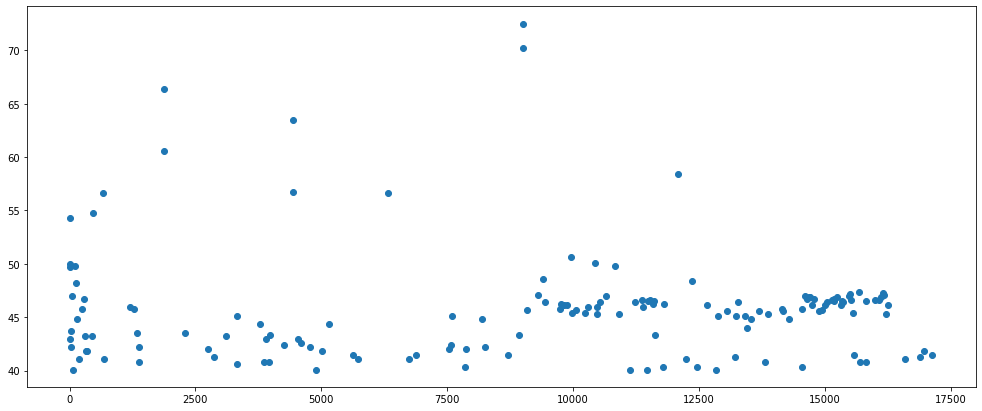

In [39]:
fig = plt.figure()
fig.set_size_inches(17, 7)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(frame_14_01[frame_14_01['Time'].isin(frame_head_14_01.loc[data_pred[0] == True]['Time'])]['Time relative'], 
           frame_14_01[frame_14_01['Time'].isin(frame_head_14_01.loc[data_pred[0] == True]['Time'])]['Amplitude, dB'])